## Predict :- Monthly Rant

In [1]:
# Importin Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Importing the data set
df = pd.read_csv('99acres_cleaned.csv')
df

,city,monthly_rant,BHKS,Baths,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
0,mumbai,17500.0,1.0,2 Baths,470,Carpet Area,Residential,Kolshet Road,75000.0
1,mumbai,75000.0,3.0,3 Baths,1800,Super built-up Area,Residential,Sector 21 Nerul,400000.0
2,mumbai,60000.0,2.0,2 Baths,950,Super built-up Area,Residential,Wadala,200000.0
3,mumbai,52000.0,3.0,3 Baths,1300,Carpet Area,Residential,Hiranandani Estate,300000.0
4,mumbai,30000.0,1.0,1 Bath,550,Built-up Area,Residential,Kanjurmarg (East),150000.0
...,...,...,...,...,...,...,...,...,...
165416,Trivandraum,10000.0,2.0,3 Baths,1200,Built-up Area,Independent,Anayara,25000.0
165417,Trivandraum,21000.0,2.0,2 Baths,1155,Carpet Area,Residential,Kazhakkoottam,50000.0
165418,Trivandraum,10000.0,2.0,2 Baths,861,Built-up Area,Residential,Vattiyoorkkav,30000.0
165419,Trivandraum,33000.0,4.0,5 Baths,3200,Plot Area,Independent,Pattom,150000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165421 entries, 0 to 165420
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   city                      165421 non-null  object 
 1   monthly_rant              165202 non-null  float64
 2   BHKS                      164872 non-null  float64
 3   Baths                     164872 non-null  object 
 4   sqft_per_inch             165421 non-null  int64  
 5   build_up_area             165421 non-null  object 
 6   Type_of_property          165421 non-null  object 
 7   location_of_the_property  165420 non-null  object 
 8   deposit                   146964 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 11.4+ MB


## Column Baths

In [4]:
# Split Bath Column and keep only usefull information
df['Baths'] = df['Baths'].str.split(" ", n = 2, expand = True)[0]

In [5]:
df.head(2)

,city,monthly_rant,BHKS,Baths,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
0,mumbai,17500.0,1.0,2,470,Carpet Area,Residential,Kolshet Road,75000.0
1,mumbai,75000.0,3.0,3,1800,Super built-up Area,Residential,Sector 21 Nerul,400000.0


In [6]:
df.Baths.unique()

array(['2', '3', '1', '5', '4', '10', '6', 'RK\n1', '7', nan, 'Baths',
       'Bath', 'RK', '9', '15', '76', '8', '22', '12', 'BHK', '20', '16',
       '17', '25', '13', '11', '18', '30', '24', '14', '26', '23', '59',
       '48', '40', '98', '19', '35', '28', '21', '37', '27', '50'],
      dtype=object)

In [7]:
# This features has highly correlated to BHKs thats why i droped
df.drop('Baths',axis=1,inplace=True)

## Column Deposite

In [8]:
#nw=df['Deposite'].str.split(" m", n = 3, expand = True)
#df['deposit']=nw[0]
#df['deposit']=pd.to_numeric(df['deposit'], errors='coerce')

# Multiply feature monthly_rant to deposite where deposite value 0 to 12
#for col,row in df.iterrows():
 #   if (row['deposit']<12 and row['deposit'] >=0 ):
#        df.loc[col,"deposit"]= row["deposit"] * row["monthly_rant"]
#    else:
 #       df.loc[col,"deposit"]= row["deposit"]

In [9]:
df.isnull().sum()

city                            0
monthly_rant                  219
BHKS                          549
sqft_per_inch                   0
build_up_area                   0
Type_of_property                0
location_of_the_property        1
deposit                     18457
dtype: int64

#### Capturing Missing Value With New Features

In [10]:
# I want to see when i will use diff-diff imputation technique what value is changed in missing rows
df['deposit_nan']=np.where(df['deposit'].isnull(),1,0)

In [11]:
df.head(2)

,city,monthly_rant,BHKS,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit,deposit_nan
0,mumbai,17500.0,1.0,470,Carpet Area,Residential,Kolshet Road,75000.0,0
1,mumbai,75000.0,3.0,1800,Super built-up Area,Residential,Sector 21 Nerul,400000.0,0


In [12]:
# Fill With median
#df['deposit'].fillna(df.deposit.median(),inplace=True)

In [13]:
df.head(10)

,city,monthly_rant,BHKS,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit,deposit_nan
0,mumbai,17500.0,1.0,470,Carpet Area,Residential,Kolshet Road,75000.0,0
1,mumbai,75000.0,3.0,1800,Super built-up Area,Residential,Sector 21 Nerul,400000.0,0
2,mumbai,60000.0,2.0,950,Super built-up Area,Residential,Wadala,200000.0,0
3,mumbai,52000.0,3.0,1300,Carpet Area,Residential,Hiranandani Estate,300000.0,0
4,mumbai,30000.0,1.0,550,Built-up Area,Residential,Kanjurmarg (East),150000.0,0
5,mumbai,42000.0,2.0,650,Built-up Area,Residential,Lower Parel,NaN,1
6,mumbai,27000.0,1.0,510,Carpet Area,Residential,Kanjurmarg (East),100000.0,0
7,mumbai,53000.0,2.0,1510,Super built-up Area,Residential,Pirojshanagar,300000.0,0
8,mumbai,175000.0,3.0,1250,Carpet Area,Residential,Bandra (East),500000.0,0
9,mumbai,200000.0,3.0,2000,Built-up Area,Residential,Grant Road West,800000.0,0


## End of Distribution imputation

In [14]:
#df.deposit.hist()

In [15]:
extreme=df.deposit.mean()+3*df.deposit.std()

In [16]:
#sns.boxplot('deposit',data=df)

In [17]:
#def impute_nan(df,variable,median,extreme):
#    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
 #   df[variable].fillna(median,inplace=True)

In [18]:
#impute_nan(df,'deposit',df.deposit.median(),extreme)

In [19]:
df.head(2)

,city,monthly_rant,BHKS,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit,deposit_nan
0,mumbai,17500.0,1.0,470,Carpet Area,Residential,Kolshet Road,75000.0,0
1,mumbai,75000.0,3.0,1800,Super built-up Area,Residential,Sector 21 Nerul,400000.0,0


In [20]:
#df.deposit_end_distribution.hist()

In [21]:
df.isnull().mean()

city                        0.000000
monthly_rant                0.001324
BHKS                        0.003319
sqft_per_inch               0.000000
build_up_area               0.000000
Type_of_property            0.000000
location_of_the_property    0.000006
deposit                     0.111576
deposit_nan                 0.000000
dtype: float64

## Column Build_up_Area

In [22]:
# Checking the unique values to deside best encoding technique
df.build_up_area.unique()

array(['Carpet Area', 'Super built-up Area', 'Built-up Area', 'Plot Area'],
      dtype=object)

In [23]:
# only four category present so i encode with get_dummies
df1 = pd.get_dummies(df.build_up_area, drop_first=True)

In [24]:
df = pd.merge(df,df1,left_index=True, right_index=True)

In [25]:
df.drop(['build_up_area','deposit_nan'], axis=1, inplace=True)

In [26]:
df.head(20)

,city,monthly_rant,BHKS,sqft_per_inch,Type_of_property,location_of_the_property,deposit,Carpet Area,Plot Area,Super built-up Area
0,mumbai,17500.0,1.0,470,Residential,Kolshet Road,75000.0,1,0,0
1,mumbai,75000.0,3.0,1800,Residential,Sector 21 Nerul,400000.0,0,0,1
2,mumbai,60000.0,2.0,950,Residential,Wadala,200000.0,0,0,1
3,mumbai,52000.0,3.0,1300,Residential,Hiranandani Estate,300000.0,1,0,0
4,mumbai,30000.0,1.0,550,Residential,Kanjurmarg (East),150000.0,0,0,0
5,mumbai,42000.0,2.0,650,Residential,Lower Parel,NaN,0,0,0
6,mumbai,27000.0,1.0,510,Residential,Kanjurmarg (East),100000.0,1,0,0
7,mumbai,53000.0,2.0,1510,Residential,Pirojshanagar,300000.0,0,0,1
8,mumbai,175000.0,3.0,1250,Residential,Bandra (East),500000.0,1,0,0
9,mumbai,200000.0,3.0,2000,Residential,Grant Road West,800000.0,0,0,0


## Column Type Of Property

In [27]:
df.Type_of_property.unique()

array(['Residential', 'Independent', 'Studio', 'Serviced', 'for', 'Farm',
       'Floor'], dtype=object)

In [28]:
#df['Type_of_property'] = df['Type_of_property'].str.split("for",' ')

In [29]:
df.shape

(165421, 10)

In [30]:
# Filtering the data (unwanted information)
df = df[df.Type_of_property!='for']
df.shape

(164783, 10)

In [31]:
df = df[df.Type_of_property!='Serviced']
df.shape


(164383, 10)

In [32]:
df = df[df.Type_of_property!='Floor']
df.shape

(164364, 10)

In [33]:
df.Type_of_property.unique()

array(['Residential', 'Independent', 'Studio', 'Farm'], dtype=object)

In [34]:
pro_type = pd.get_dummies(df['Type_of_property'],drop_first=True)

In [35]:
df = pd.merge(df,pro_type, right_index=True, left_index=True)

In [36]:
df.drop('Type_of_property',axis=1, inplace=True)

In [37]:
df.head(2)

,city,monthly_rant,BHKS,sqft_per_inch,location_of_the_property,deposit,Carpet Area,Plot Area,Super built-up Area,Independent,Residential,Studio
0,mumbai,17500.0,1.0,470,Kolshet Road,75000.0,1,0,0,0,1,0
1,mumbai,75000.0,3.0,1800,Sector 21 Nerul,400000.0,0,0,1,0,1,0


In [38]:
df.isnull().sum()

city                            0
monthly_rant                  219
BHKS                           52
sqft_per_inch                   0
location_of_the_property        1
deposit                     18292
Carpet Area                     0
Plot Area                       0
Super built-up Area             0
Independent                     0
Residential                     0
Studio                          0
dtype: int64

In [39]:
# Missing values is less than 10% so i droped it
df.dropna(inplace=True)

In [40]:
df.isnull().sum()

city                        0
monthly_rant                0
BHKS                        0
sqft_per_inch               0
location_of_the_property    0
deposit                     0
Carpet Area                 0
Plot Area                   0
Super built-up Area         0
Independent                 0
Residential                 0
Studio                      0
dtype: int64

## City

In [41]:
df.city.unique()

array(['mumbai', 'pune', 'chennai', 'bangalore', 'hyderabad', 'Ahmedabad',
       'ncr', 'Trivandraum'], dtype=object)

In [42]:
dum_city = pd.get_dummies(df.city, drop_first=True)

In [43]:
df = pd.merge(df,dum_city, right_index=True, left_index=True)

In [44]:
df.drop('city', axis=1, inplace=True)

In [45]:
df.head(2)

,monthly_rant,BHKS,sqft_per_inch,location_of_the_property,deposit,Carpet Area,Plot Area,Super built-up Area,Independent,Residential,Studio,Trivandraum,bangalore,chennai,hyderabad,mumbai,ncr,pune
0,17500.0,1.0,470,Kolshet Road,75000.0,1,0,0,0,1,0,0,0,0,0,1,0,0
1,75000.0,3.0,1800,Sector 21 Nerul,400000.0,0,0,1,0,1,0,0,0,0,0,1,0,0


## Location Of the Property

In [46]:
df.location_of_the_property.nunique()

12489

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [48]:
le.fit(df['location_of_the_property'])

LabelEncoder()

In [49]:
df['location_of_the_property'] = le.transform(df['location_of_the_property'])

In [50]:
df.isna().sum()

monthly_rant                0
BHKS                        0
sqft_per_inch               0
location_of_the_property    0
deposit                     0
Carpet Area                 0
Plot Area                   0
Super built-up Area         0
Independent                 0
Residential                 0
Studio                      0
Trivandraum                 0
bangalore                   0
chennai                     0
hyderabad                   0
mumbai                      0
ncr                         0
pune                        0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146034 entries, 0 to 165420
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   monthly_rant              146034 non-null  float64
 1   BHKS                      146034 non-null  float64
 2   sqft_per_inch             146034 non-null  int64  
 3   location_of_the_property  146034 non-null  int32  
 4   deposit                   146034 non-null  float64
 5   Carpet Area               146034 non-null  uint8  
 6   Plot Area                 146034 non-null  uint8  
 7   Super built-up Area       146034 non-null  uint8  
 8   Independent               146034 non-null  uint8  
 9   Residential               146034 non-null  uint8  
 10  Studio                    146034 non-null  uint8  
 11  Trivandraum               146034 non-null  uint8  
 12  bangalore                 146034 non-null  uint8  
 13  chennai                   146034 non-null  u

In [52]:
df.head(2)

,monthly_rant,BHKS,sqft_per_inch,location_of_the_property,deposit,Carpet Area,Plot Area,Super built-up Area,Independent,Residential,Studio,Trivandraum,bangalore,chennai,hyderabad,mumbai,ncr,pune
0,17500.0,1.0,470,4649,75000.0,1,0,0,0,1,0,0,0,0,0,1,0,0
1,75000.0,3.0,1800,8511,400000.0,0,0,1,0,1,0,0,0,0,0,1,0,0


In [53]:
df.shape

(146034, 18)

In [54]:
#sns.scatterplot(x=df['deposit'],y=range(0,147896))

## -----------------------------------------------------------------------------------------------------------------------------

## deposit :- End Of the Distribution

In [55]:
#sns.boxplot(df['deposit_end_distribution'])

In [56]:
#Q1 = df['deposit_end_distribution'].quantile(0.25)
#Q3 = df['deposit_end_distribution'].quantile(0.75)
#IQR = Q3 - Q1

In [57]:
#((df['deposit_end_distribution'] < (Q1 - 1.5 * IQR)) | (df['deposit_end_distribution'] > (Q3 + 1.5 * IQR))).mean()

#mask = (df['deposit_end_distribution'] < (Q1 - 1.5 * IQR)) | (df['deposit_end_distribution'] > (Q3 + 1.5 * IQR))
#df[mask] = np.nan

In [58]:
#sns.boxplot(df['deposit_end_distribution'])

## deposit (Checking Outliers)

C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='deposit'>

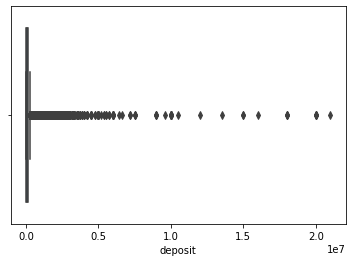

In [59]:
sns.boxplot(df['deposit'])

In [60]:
Q1 = df['deposit'].quantile(0.25)
Q3 = df['deposit'].quantile(0.75)
IQR = Q3 - Q1

In [61]:
((df['deposit'] < (Q1 - 1.5 * IQR)) | (df['deposit'] > (Q3 + 1.5 * IQR))).mean()

mask = (df['deposit'] < (Q1 - 1.5 * IQR)) | (df['deposit'] > (Q3 + 1.5 * IQR))
df[mask] = np.nan

C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='deposit'>

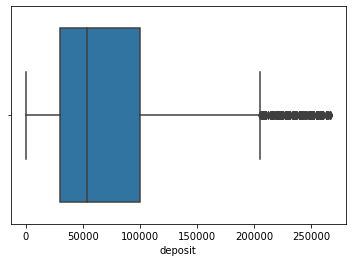

In [62]:
sns.boxplot(df['deposit'])

* We clearly observed in boxplot data is right skewed

In [63]:
#from sklearn.preprocessing import MinMaxScaler
#mms = MinMaxScaler()

In [64]:
#mms.fit(df[['deposit']])

In [65]:
#df['deposit'] = mms.transform(df[['deposit']])

In [66]:
#df.isnull().mean()

In [67]:
df.dropna(inplace=True)

<AxesSubplot:>

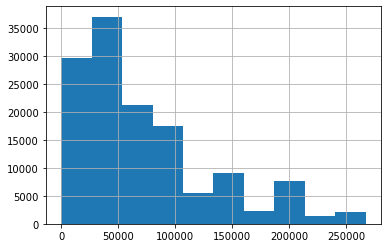

In [68]:
# Checking Distribution
df['deposit'].hist()

<AxesSubplot:>

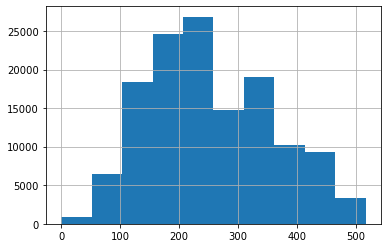

In [69]:
# Features Transformation
df['deposit']=df['deposit']**(1/2)
df['deposit'].hist()

In [70]:
#df.drop('deposit_end_distribution', axis=1, inplace=True)

In [71]:
df.head(2)

,monthly_rant,BHKS,sqft_per_inch,location_of_the_property,deposit,Carpet Area,Plot Area,Super built-up Area,Independent,Residential,Studio,Trivandraum,bangalore,chennai,hyderabad,mumbai,ncr,pune
0,17500.0,1.0,470.0,4649.0,273.861279,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,60000.0,2.0,950.0,11066.0,447.213595,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [72]:
#mms_l = MinMaxScaler()

In [73]:
#mms_l.fit(df[['location_of_the_property']])

In [74]:
#df.location_of_the_property = mms_l.transform(df[['location_of_the_property']])

In [75]:
#df.head(2)

## sqft_per_inch

C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_per_inch'>

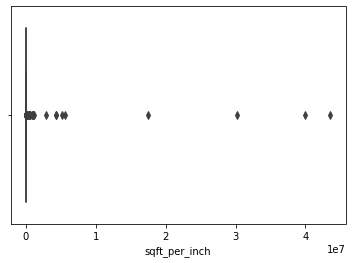

In [76]:
# Checking Outliers
sns.boxplot(df.sqft_per_inch)

In [77]:
#mms_sqpi = MinMaxScaler()

In [78]:
#mms_sqpi.fit(df[['sqft_per_inch']])

In [79]:
#df['sqft_per_inch'] = mms_sqpi.transform(df[['sqft_per_inch']])

In [80]:
Q1 = df['sqft_per_inch'].quantile(0.25)
Q3 = df['sqft_per_inch'].quantile(0.75)
IQR = Q3 - Q1

In [81]:
# Fixing outliers Using Upper and Lower Limit
((df['sqft_per_inch'] < (Q1 - 1.5 * IQR)) | (df['sqft_per_inch'] > (Q3 + 1.5 * IQR))).mean()

mask = (df['sqft_per_inch'] < (Q1 - 1.5 * IQR)) | (df['sqft_per_inch'] > (Q3 + 1.5 * IQR))
df[mask] = np.nan

C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_per_inch'>

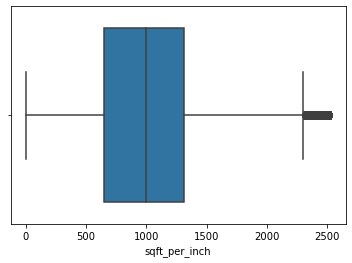

In [82]:
sns.boxplot(df.sqft_per_inch)

In [83]:
df.dropna(inplace=True)

In [84]:
df.head(2)

,monthly_rant,BHKS,sqft_per_inch,location_of_the_property,deposit,Carpet Area,Plot Area,Super built-up Area,Independent,Residential,Studio,Trivandraum,bangalore,chennai,hyderabad,mumbai,ncr,pune
0,17500.0,1.0,470.0,4649.0,273.861279,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,60000.0,2.0,950.0,11066.0,447.213595,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [85]:
df.shape

(128174, 18)

In [86]:
df.skew()

monthly_rant                136.285328
BHKS                          2.734330
sqft_per_inch                 0.647451
location_of_the_property     -0.125224
deposit                       0.432555
Carpet Area                   1.112882
Plot Area                     3.510014
Super built-up Area           0.120117
Independent                   0.983884
Residential                  -0.875202
Studio                        6.822607
Trivandraum                  17.425462
bangalore                     1.674245
chennai                       3.366466
hyderabad                     4.079299
mumbai                        1.215462
ncr                           0.978234
pune                          2.119496
dtype: float64

In [87]:
df['monthly_rant'] = np.log(df['monthly_rant']+1)

In [88]:
df['BHKS'] = np.log(df['BHKS']+1)

In [89]:
df.shape

(128174, 18)

## ----------------------------------------------------------Modeling------------------------------------------------------------

In [90]:
#Seperating the variable Independent matrix X and dependent Vector y

X = df.drop('monthly_rant',axis=1)
y = df.monthly_rant

In [91]:
X.head(2)

,BHKS,sqft_per_inch,location_of_the_property,deposit,Carpet Area,Plot Area,Super built-up Area,Independent,Residential,Studio,Trivandraum,bangalore,chennai,hyderabad,mumbai,ncr,pune
0,0.693147,470.0,4649.0,273.861279,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.098612,950.0,11066.0,447.213595,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [92]:
y.head(2)

0     9.770013
2    11.002117
Name: monthly_rant, dtype: float64

In [93]:
# Spliting the data into Training set & Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [94]:
 #  Linear Regression
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

In [95]:
y_pred_train = lr_reg.predict(X_train)
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.7441136081950639

In [96]:
y_pred_lr_reg = lr_reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lr_reg)

0.7331851630095017

In [97]:
 #  Polynomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

In [98]:
y_pred_poly = regressor.predict(poly_reg.transform(X_test))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_poly)

0.7802968260199381

In [99]:
# Decission Tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train,y_train)    

DecisionTreeRegressor(random_state=0)

In [100]:
# Get r2_score
y_pred_tree = tree.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_tree)

0.7566404924694394

In [101]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [102]:
y_predict=forest.predict(X_test)
y_predict_train=forest.predict(X_train)

In [103]:
print('Random Forest Train r2_score',r2_score(y_train,y_predict_train))
print('Random Forest Test r2_score',r2_score(y_test,y_predict))

Random Forest Train r2_score 0.9782794950366972
Random Forest Test r2_score 0.8486130285908373


### Boosting Algorithms

In [104]:
from sklearn.ensemble import AdaBoostRegressor
ada_boost = AdaBoostRegressor()
ada_boost.fit(X_train,y_train)

AdaBoostRegressor()

In [105]:
y_pred_ada_boost = ada_boost.predict(X_test)
y_pred_ada_train = ada_boost.predict(X_train)

from sklearn.metrics import r2_score
print('Ada Boost Test r2_score',r2_score(y_test, y_pred_ada_boost))
print('Ada Boost Test r2_score',r2_score(y_train, y_pred_ada_train))

Ada Boost Test r2_score 0.28200269749013573
Ada Boost Test r2_score 0.29471079379762877


In [106]:
# Use Gradient Boost 
from sklearn.ensemble import GradientBoostingRegressor
gb_m = GradientBoostingRegressor()
gb_m.fit(X_train,y_train)
    

GradientBoostingRegressor()

In [107]:
y_pred_gb_train = gb_m.predict(X_train)
from sklearn.metrics import r2_score
print('Gradirnt Boost Train r2_score',r2_score(y_train, y_pred_gb_train))

Gradirnt Boost Train r2_score 0.8146688719465485


In [108]:
y_pred_gb = gb_m.predict(X_test)
from sklearn.metrics import r2_score
print('Gradirnt Boost Test r2_score',r2_score(y_test, y_pred_gb))

Gradirnt Boost Test r2_score 0.8003200013700589


In [109]:

from xgboost import XGBRegressor
xgbr = XGBRegressor(objective = 'reg:squarederror',
                            colsample_bytree= 0.7,
                               learning_rate= 0.1,
                                 max_depth = 10,
                             min_child_weight =  3,
                                n_estimators = 400,
                                subsample = 0.7)
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [110]:
y_pred_xgbr_train = xgbr.predict(X_train)
y_pred_xgbr = xgbr.predict(X_test)

from sklearn.metrics import r2_score

print('Xtream Gradirnt Boost Train r2_score',r2_score(y_train, y_pred_xgbr_train))
print('Xtream Gradirnt Boost Test r2_score',r2_score(y_test, y_pred_xgbr))

Xtream Gradirnt Boost Train r2_score 0.9357935257631552
Xtream Gradirnt Boost Test r2_score 0.872245780293962


## Model Tunning

In [111]:
#from sklearn.model_selection import GridSearchCV

In [112]:
#param_tuning = {
 #       'learning_rate': [0.01, 0.1],
  #      'max_depth': [3, 5, 7, 10],
   #     'min_child_weight': [1, 3, 5],
    #    'subsample': [0.5, 0.7],
     #   'colsample_bytree': [0.5, 0.7],
      #  'n_estimators' : [100, 200, 500],
       # 'objective': ['reg:squarederror']
   # }

In [113]:
#xgb_model = XGBRegressor()

In [114]:
#gsearch = GridSearchCV(estimator = xgb_model,
#                           param_grid = param_tuning,                        
 #                          scoring = 'neg_mean_squared_error',  #MSE
  #                         cv = 5,
   #                        n_jobs = -1,
    #                       verbose = 1)

In [115]:
#gsearch.fit(X_train,y_train)

In [116]:
#gsearch.best_params_

## Save Model

In [117]:
import pickle

In [118]:
# Saving the model
pickle.dump(xgbr, open('model.pkl','wb'))